<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.081008,74.653504,-0.000277,123.734235,123.734572,-0.000337
1,0.0,1.0,88.574284,89.743525,-0.000109,188.317700,188.317649,0.000051
2,0.0,2.0,30.969735,53.639294,-0.000964,94.608066,94.609234,-0.001168
3,0.0,3.0,61.730619,56.871574,0.000651,128.602844,128.602297,0.000547
4,0.0,4.0,94.075659,24.879742,-0.002442,128.952958,128.955605,-0.002647
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.954775,50.410972,-0.001138,151.364609,151.365687,-0.001078
249996,999.0,246.0,54.780473,33.370725,0.000098,98.151296,98.151043,0.000253
249997,999.0,247.0,59.010029,68.618891,0.000137,137.629057,137.628919,0.000138
249998,999.0,248.0,38.936969,50.262678,-0.000638,99.199009,99.199555,-0.000545


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.081008  74.653504 -0.000277  123.734235  123.734572 -0.000337
      1.0    88.574284  89.743525 -0.000109  188.317700  188.317649  0.000051
      2.0    30.969735  53.639294 -0.000964   94.608066   94.609234 -0.001168
      3.0    61.730619  56.871574  0.000651  128.602844  128.602297  0.000547
      4.0    94.075659  24.879742 -0.002442  128.952958  128.955605 -0.002647
...                ...        ...       ...         ...         ...       ...
999.0 245.0  90.954775  50.410972 -0.001138  151.364609  151.365687 -0.001078
      246.0  54.780473  33.370725  0.000098   98.151296   98.151043  0.000253
      247.0  59.010029  68.618891  0.000137  137.629057  137.628919  0.000138
      248.0  38.936969  50.262678 -0.000638   99.199009   99.199555 -0.000545
      249.0  77.263018  52.242962 -0.000063  139.505917  139.505920 -0.000002

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.081008  74.653504 -0.000277  123.734235  123.734572 -0.000337
      1.0    88.574284  89.743525 -0.000109  188.317700  188.317649  0.000051
      2.0    30.969735  53.639294 -0.000964   94.608066   94.609234 -0.001168
      3.0    61.730619  56.871574  0.000651  128.602844  128.602297  0.000547
      4.0    94.075659  24.879742 -0.002442  128.952958  128.955605 -0.002647
...                ...        ...       ...         ...         ...       ...
999.0 245.0  90.954775  50.410972 -0.001138  151.364609  151.365687 -0.001078
      246.0  54.780473  33.370725  0.000098   98.151296   98.151043  0.000253
      247.0  59.010029  68.618891  0.000137  137.629057  137.628919  0.000138
      248.0  38.936969  50.262678 -0.000638   99.199009   99.199555 -0.000545
      249.0  77.263018  52.242962 -0.000063  139.505917  139.505920 -0.000002

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.081008,74.653504,-0.000277,123.734235,123.734572,-0.000337
1,0.0,1.0,88.574284,89.743525,-0.000109,188.317700,188.317649,0.000051
2,0.0,2.0,30.969735,53.639294,-0.000964,94.608066,94.609234,-0.001168
3,0.0,3.0,61.730619,56.871574,0.000651,128.602844,128.602297,0.000547
4,0.0,4.0,94.075659,24.879742,-0.002442,128.952958,128.955605,-0.002647
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.954775,50.410972,-0.001138,151.364609,151.365687,-0.001078
249996,999.0,246.0,54.780473,33.370725,0.000098,98.151296,98.151043,0.000253
249997,999.0,247.0,59.010029,68.618891,0.000137,137.629057,137.628919,0.000138
249998,999.0,248.0,38.936969,50.262678,-0.000638,99.199009,99.199555,-0.000545


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.081008  74.653504 -0.000277  123.734235  123.734572 -0.000337
      1.0    88.574284  89.743525 -0.000109  188.317700  188.317649  0.000051
      2.0    30.969735  53.639294 -0.000964   94.608066   94.609234 -0.001168
      3.0    61.730619  56.871574  0.000651  128.602844  128.602297  0.000547
      4.0    94.075659  24.879742 -0.002442  128.952958  128.955605 -0.002647
...                ...        ...       ...         ...         ...       ...
999.0 245.0  90.954775  50.410972 -0.001138  151.364609  151.365687 -0.001078
      246.0  54.780473  33.370725  0.000098   98.151296   98.151043  0.000253
      247.0  59.010029  68.618891  0.000137  137.629057  137.628919  0.000138
      248.0  38.936969  50.262678 -0.000638   99.199009   99.199555 -0.000545
      249.0  77.263018  52.242962 -0.000063  139.505917  139.505920 -0.000002

[250000 rows x 6 columns]

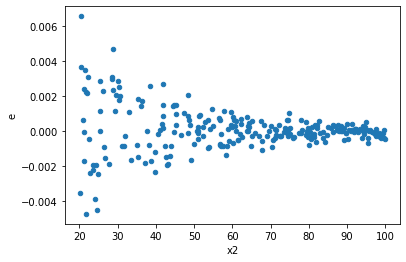

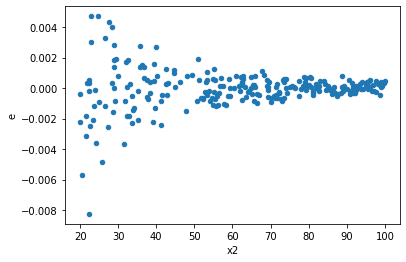

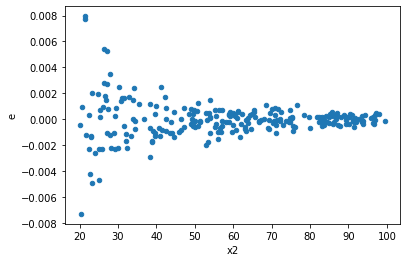

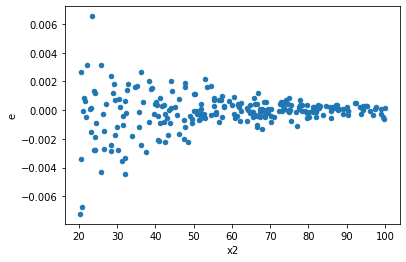

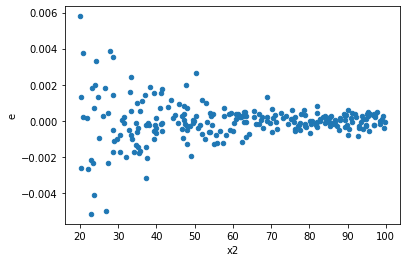

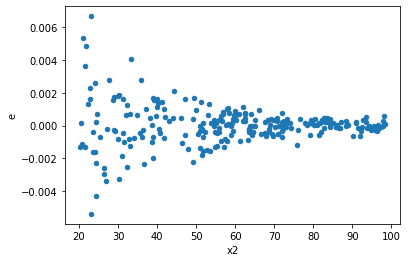

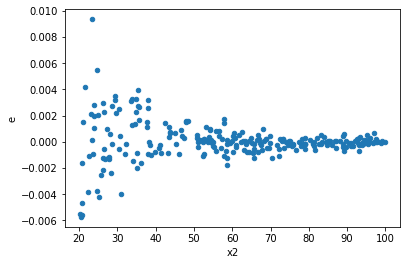

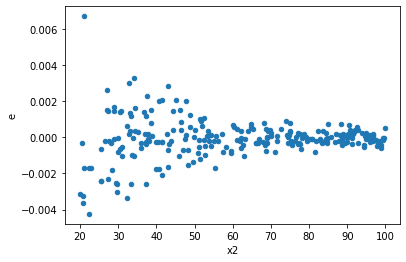

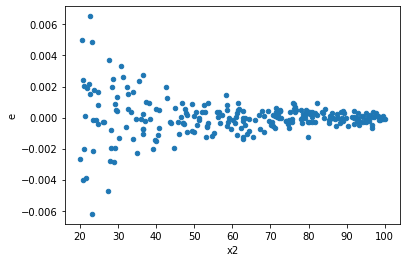

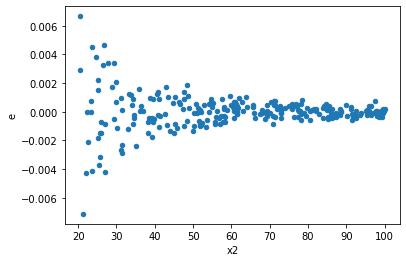

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,136.0,110.0,0.00010657407208735541,0.0003073180084656376,7.836328829952604e-07,2.793800076960342e-06,3.5651899474683475,3.160338657437478e-11,0.9999999999841983,1.580169328718739e-11,Reject005=0 : Heteroscedasticity
3.0,123.0,123.0,5.198393600510364e-05,0.00038766739316713856,4.2263362605775313e-07,3.1517674241230777e-06,7.4574459527089,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,104.0,142.0,3.436417869252548e-05,0.0002914336627819625,3.3042479512043733e-07,2.0523497379011445e-06,6.2112461540698805,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,128.0,118.0,6.07104613458333e-05,0.00032127533564337013,4.7430047926432266e-07,2.722672335960764e-06,5.740395498195243,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,87.0,159.0,2.5975925556480133e-05,0.00036728956087288094,2.98573856971036e-07,2.30999723819422e-06,7.736769928983795,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
9.0,120.0,126.0,4.9064309856932596e-05,0.0003501553008119587,4.0886924880777165e-07,2.779010323904434e-06,6.796819110284754,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
10.0,121.0,125.0,4.696898407762321e-05,0.0003160728656851032,3.8817342212911745e-07,2.528582925480826e-06,6.514054753186445,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
12.0,106.0,140.0,2.1881301957880947e-05,0.00034272786183317137,2.06427376961141e-07,2.448056155951224e-06,11.859164186405659,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
13.0,128.0,118.0,5.9823791421860765e-05,0.0003323838730439267,4.673733704832872e-07,2.8168124834231077e-06,6.026899822106647,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,118.0,128.0,0.0003378540719922307,4.725779381922368e-05,2.863170101629074e-06,3.69201514212685e-07,0.12894850850901884,2.4707085037240288e-25,Reject005=0 : Heteroscedasticity
1.0,136.0,110.0,0.00010657407208735541,0.0003073180084656376,7.836328829952604e-07,2.793800076960342e-06,3.5651899474683475,3.160338657437478e-11,Reject005=0 : Heteroscedasticity
2.0,123.0,123.0,0.0004589566892387916,5.093856669185981e-05,3.731355197063346e-06,4.141346885517058e-07,0.11098774216875369,4.3635392242259665e-29,Reject005=0 : Heteroscedasticity
3.0,123.0,123.0,5.198393600510364e-05,0.00038766739316713856,4.2263362605775313e-07,3.1517674241230777e-06,7.4574459527089,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,104.0,142.0,3.436417869252548e-05,0.0002914336627819625,3.3042479512043733e-07,2.0523497379011445e-06,6.2112461540698805,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,128.0,118.0,6.07104613458333e-05,0.00032127533564337013,4.7430047926432266e-07,2.722672335960764e-06,5.740395498195243,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,135.0,111.0,0.000537778444930944,3.529547687360611e-05,3.983544036525511e-06,3.1797726913158655e-07,0.0798227071713081,2.2033105624536515e-38,Reject005=0 : Heteroscedasticity
7.0,124.0,122.0,0.00027126576208254797,3.847545826246066e-05,2.187627113568935e-06,3.153726087086939e-07,0.14416195829379225,9.642399270238543e-24,Reject005=0 : Heteroscedasticity
8.0,87.0,159.0,2.5975925556480133e-05,0.00036728956087288094,2.98573856971036e-07,2.30999723819422e-06,7.736769928983795,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    998
Reject005=1 : Homoscedasticity        2
Name: Result_test, dtype: int64